In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [119]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [120]:
match_df = pd.read_csv("international_matches.csv")
match_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#load dataset
match_df = pd.read_csv("international_matches.csv")
match_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [123]:
match_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [124]:
match_df.head(1)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
match_df.shape

(23921, 25)

In [126]:
match_df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [127]:
match_df = match_df.drop(['home_team_continent', 'away_team_continent', 'city', 
              'shoot_out', 'home_team_mean_midfield_score', 'home_team_mean_offense_score', 
              'home_team_goalkeeper_score', 'home_team_mean_defense_score', 
              'away_team_mean_midfield_score', 'away_team_mean_offense_score', 
              'away_team_goalkeeper_score',  'away_team_mean_defense_score'], axis=1)

In [128]:
match_df.head()

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,country,neutral_location,home_team_result
0,1993-08-08,Bolivia,Uruguay,59,22,0,0,3,1,FIFA World Cup qualification,Bolivia,False,Win
1,1993-08-08,Brazil,Mexico,8,14,0,0,1,1,Friendly,Brazil,False,Draw
2,1993-08-08,Ecuador,Venezuela,35,94,0,0,5,0,FIFA World Cup qualification,Ecuador,False,Win
3,1993-08-08,Guinea,Sierra Leone,65,86,0,0,1,0,Friendly,Guinea,False,Win
4,1993-08-08,Paraguay,Argentina,67,5,0,0,1,3,FIFA World Cup qualification,Paraguay,False,Lose


In [129]:
match_df = match_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})

In [130]:
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [131]:
match_df['rank_difference'] = match_df['home_team_fifa_rank'] - match_df['away_team_fifa_rank']
match_df['average_rank'] = (match_df['home_team_fifa_rank'] + match_df['away_team_fifa_rank'])/2
match_df['point_difference'] = match_df['home_team_total_fifa_points'] - match_df['away_team_total_fifa_points']
match_df['is_stake'] = match_df['tournament'] != 'Friendly'
match_df['is_worldcup'] = 'FIFA World Cup' in match_df['tournament']

match_df['score_difference'] = match_df['home_team_score'] - match_df['away_team_score'] # Note that this feature is not used in training
match_df['is_won'] = match_df['score_difference'] > 0 # Take draw as lost

In [132]:
X, y = match_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup']], match_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

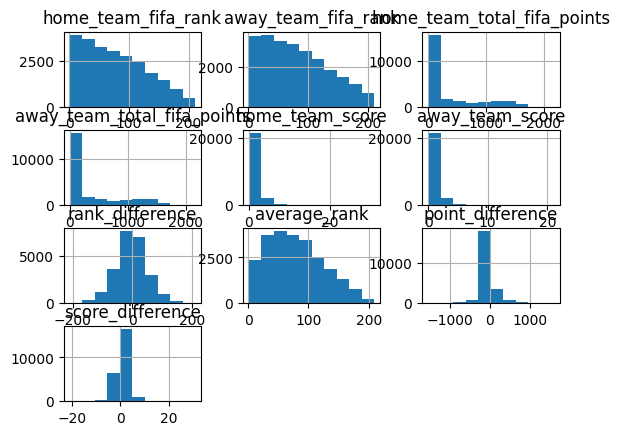

In [133]:
match_df.hist()
plt.show()

In [134]:
match_df['date']=pd.to_datetime(match_df['date'])
match_df

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,country,neutral_location,home_team_result,rank_difference,average_rank,point_difference,is_stake,is_worldcup,score_difference,is_won
0,1993-08-08,Bolivia,Uruguay,59,22,0,0,3,1,FIFA World Cup qualification,Bolivia,False,Win,37,40.5,0,True,False,2,True
1,1993-08-08,Brazil,Mexico,8,14,0,0,1,1,Friendly,Brazil,False,Draw,-6,11.0,0,False,False,0,False
2,1993-08-08,Ecuador,Venezuela,35,94,0,0,5,0,FIFA World Cup qualification,Ecuador,False,Win,-59,64.5,0,True,False,5,True
3,1993-08-08,Guinea,Sierra Leone,65,86,0,0,1,0,Friendly,Guinea,False,Win,-21,75.5,0,False,False,1,True
4,1993-08-08,Paraguay,Argentina,67,5,0,0,1,3,FIFA World Cup qualification,Paraguay,False,Lose,62,36.0,0,True,False,-2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,932,1040,2,1,UEFA Nations League,Moldova,False,Win,27,166.5,-108,True,False,1,True
23917,2022-06-14,Liechtenstein,Latvia,192,135,895,1105,0,2,UEFA Nations League,Liechtenstein,False,Lose,57,163.5,-210,True,False,-2,False
23918,2022-06-14,Chile,Ghana,28,60,1526,1387,0,0,Kirin Cup,Japan,True,Lose,-32,44.0,139,True,False,0,False
23919,2022-06-14,Japan,Tunisia,23,35,1553,1499,0,3,Kirin Cup,Japan,False,Lose,-12,29.0,54,True,False,-3,False


In [135]:
#Exploratory Data Analysis
fifa_rank = match_df[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank','away_team_total_fifa_points','home_team_total_fifa_points']]

In [136]:
home = fifa_rank[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team':'team', 'home_team_fifa_rank':'rank','home_team_total_fifa_points':'rank_points'})
away = fifa_rank[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team':'team', 'away_team_fifa_rank':'rank','away_team_total_fifa_points':'rank_points'})
fifa_rank = home.append(away)
fifa_rank = fifa_rank.sort_values(['team','date'],ascending = [True,False])
fifa_rank['row_number']= fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10,'rank')

#10 Strongest teams
fifa_rank_top

C:\Users\ACER\AppData\Local\Temp\ipykernel_2128\2637435850.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [137]:
columns_contains_null = [col for col in match_df.columns if match_df[col].isnull().any()]
print(f'columns contain\'null\' values : \n\n (columns_contains_null)')

columns contain'null' values : 

 (columns_contains_null)


In [138]:
wc_2022 = ['Qatar','Ecuador','Senegal','Netherland','England','Iran','USA','Wales','Argentina','Saudi Arabia','Mexico','Poland','France','Australia','Denmark','Tunisia','Spain','Costaa Rica','Germany','Japan','Belgium','Canada','Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon','Portugal','Ghana','Uruguay','South Korea']

In [139]:
#Q1 - Is there such a thing as home team advantage?
home_team = match_df[['country','home_team_score','away_team_score']]
home_team.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [140]:
home_team['home_team_score']>home_team['away_team_score']
home_wins = home_team.loc[home_team['home_team_score']>home_team['away_team_score']]
home_wins

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0
...,...,...,...
23908,Netherlands,3,2
23912,Bosnia and Herzegovina,3,2
23915,Turkey,2,0
23916,Moldova,2,1


In [141]:
home_team['home_team_score']<home_team['away_team_score']
home_loss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
home_loss

,country,home_team_score,away_team_score
4,Paraguay,1,3
5,Peru,0,1
8,Faroe Islands,0,7
9,Sweden,1,2
26,Iceland,0,1
...,...,...,...
23909,Poland,0,1
23910,Armenia,1,4
23913,Romania,0,3
23917,Liechtenstein,0,2


In [142]:
home_ad = home_wins[['country','home_team_score','away_team_score']].rename(columns = {'home_team_score' : 'home_team_win','away_team_score' : 'home_team_loss'})
away_ad = home_loss[['country','home_team_score','away_team_score']].rename(columns = {'home_team_score' : 'home_team_win','away_team_score' : 'home_team_loss'})

home_advantage = home_ad.append(away_ad)
home_advantage.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2128\3027091878.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_advantage = home_ad.append(away_ad)


,country,home_team_win,home_team_loss
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0


C:\Users\ACER\AppData\Local\Temp\ipykernel_2128\2905102216.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  home_advantage.mean().plot(kind = 'pie',title= 'Home Advantage vs Home Team Loss', labels = ['home_team_wins','home_team_loss'],figsize = (6,6))


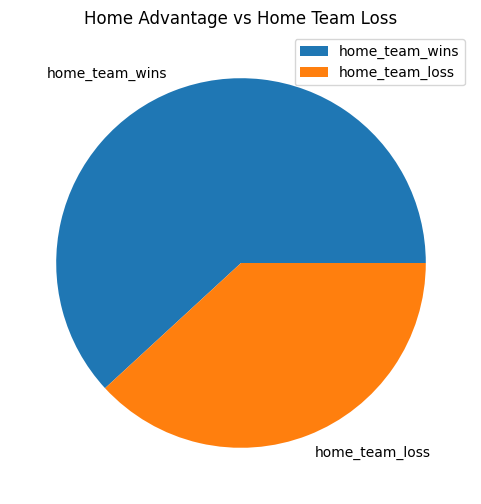

In [143]:
home_advantage.mean().plot(kind = 'pie',title= 'Home Advantage vs Home Team Loss', labels = ['home_team_wins','home_team_loss'],figsize = (6,6))
plt.legend();

In [144]:
hometeam = match_df[['date','home_team','home_team_score','away_team_score']]

hometeam.head(25)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [145]:
hometeam['home_team_score']>hometeam['away_team_score']
home_wins = hometeam.loc[home_team['home_team_score']>hometeam['away_team_score']]
home_wins.head()

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0


In [146]:
hometeam['home_team_score']<hometeam['away_team_score']
home_loss = hometeam.loc[home_team['home_team_score']<hometeam['away_team_score']]
home_loss.head()

,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1


In [147]:
hometeam_wins = home_wins[['date','home_team','home_team_score','away_team_score']].rename(columns = {'home_team' : 'team','home_team_score' : 'home_team_win','away_team_score' : 'away_team_win'})
awayteam_wins = home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns = {'home_team' : 'team','home_team_score' : 'home_team_win','away_team_score' : 'away_team_win'})
team_streak = hometeam_wins.append(awayteam_wins)
team_streak

C:\Users\ACER\AppData\Local\Temp\ipykernel_2128\4007346269.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_streak = hometeam_wins.append(awayteam_wins)


,date,team,home_team_win,away_team_win
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
...,...,...,...,...
23909,2022-06-14,Poland,0,1
23910,2022-06-14,Armenia,1,4
23913,2022-06-14,Romania,0,3
23917,2022-06-14,Liechtenstein,0,2


In [148]:
goals_conceded_home, goals_scored_home, goals_conceded_away, goals_scored_away = [], [], [], []
total_goals_scored, total_goals_conceded = [], []
for team in wc_2022:
    gch = match_df[match_df['home_team']==team]['away_team_score'].sum()
    gsh = match_df[match_df['home_team']==team]['home_team_score'].sum()
    gca = match_df[match_df['away_team']==team]['home_team_score'].sum()
    gsa = match_df[match_df['away_team']==team]['away_team_score'].sum()
    
    
    tgc = np.add(gch,gca)
    tgs = np.add(gsh,gsa)
    
    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)
    
    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)
    
goals = pd.DataFrame({'Team':wc_2022,'Scored goals home':goals_scored_home,'Scored goals away':goals_scored_away,'Conceded goals home':goals_conceded_home,'Conceded goals away':goals_conceded_away ,'Total scored goals':total_goals_scored,'Total conceded goals':total_goals_conceded})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals']/ goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending = False).reset_index(drop = True)
goals.index += 1
goals


,Team,Scored goals home,Scored goals away,Conceded goals home,Conceded goals away,Total scored goals,Total conceded goals,Goal difference,Goal ratio
1,Brazil,558,396,141,159,954,300,654,3.180000
2,Spain,469,312,107,141,781,248,533,3.149194
3,Germany,544,331,220,171,875,391,484,2.237852
4,Iran,425,288,115,165,713,280,433,2.546429
5,France,447,223,154,112,670,266,404,2.518797
6,Portugal,424,244,124,144,668,268,400,2.492537
7,England,384,246,132,119,630,251,379,2.509960
8,Japan,533,243,273,153,776,426,350,1.821596
9,Mexico,572,286,272,247,858,519,339,1.653179
10,Australia,435,194,127,164,629,291,338,2.161512


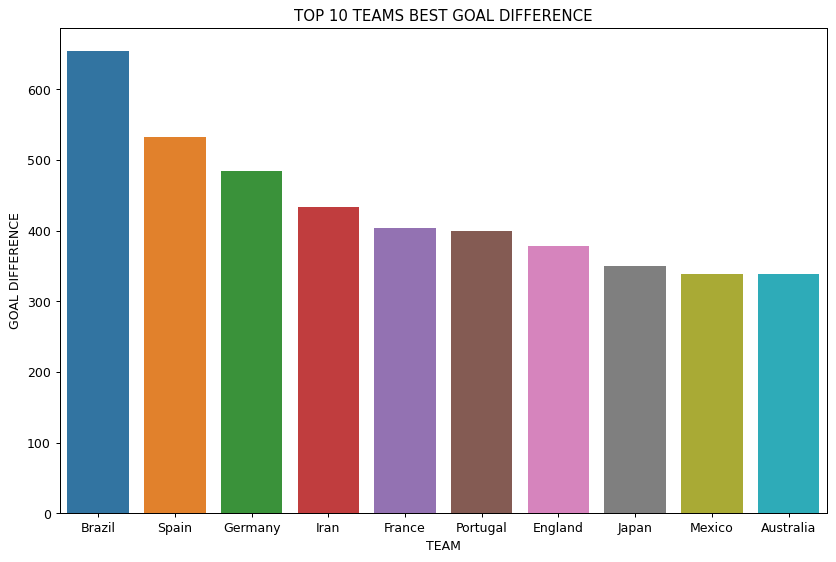

In [149]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goals[:10], x='Team', y='Goal difference')
plt.xlabel('TEAM')
plt.ylabel('GOAL DIFFERENCE')
plt.title('TOP 10 TEAMS BEST GOAL DIFFERENCE');

In [150]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

64.54

In [151]:
y_predict = random_forest.predict(X_test)
y_predict

array([0., 0., 0., ..., 0., 1., 0.])

In [152]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1648,  805],
       [ 892, 1440]], dtype=int64)

<AxesSubplot: >

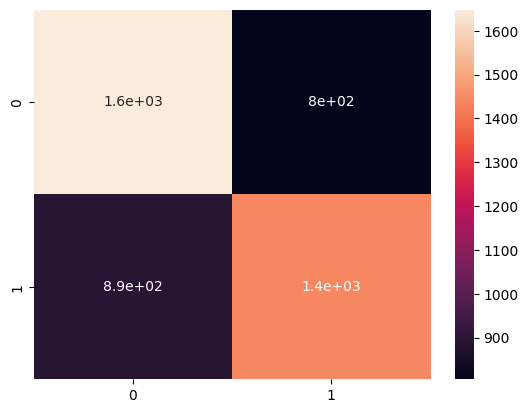

In [153]:
sns.heatmap(cm, annot=True)

In [154]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.65      0.67      0.66      2453
        True       0.64      0.62      0.63      2332

    accuracy                           0.65      4785
   macro avg       0.65      0.64      0.64      4785
weighted avg       0.65      0.65      0.65      4785



In [155]:
print("accuracy : ", random_forest.score(X_test,y_test))

accuracy :  0.645350052246604


In [156]:
import pickle
Pkl_Filename = "logistic_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(random_forest, file)

In [157]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

RandomForestClassifier()